In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from pycaret.datasets import get_data
all_datasets = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

In [3]:
df = get_data('anomaly')

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
 2   Col3    1000 non-null   float64
 3   Col4    1000 non-null   float64
 4   Col5    1000 non-null   float64
 5   Col6    1000 non-null   float64
 6   Col7    1000 non-null   float64
 7   Col8    1000 non-null   float64
 8   Col9    1000 non-null   float64
 9   Col10   1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
# swarm-plot

In [6]:
#plt.rcParams["figure.figsize"] = (10,8) rcparams ile matplotlib konfigure edildi sadece
sns.swarmplot(x="variable", y="value", data=pd.melt(df))
plt.show()

/home/dp/anaconda3/envs/pycaret_env/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dp/anaconda3/envs/pycaret_env/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dp/anaconda3/envs/pycaret_env/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dp/anaconda3/envs/pycaret_env/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dp/anaconda3/e

In [7]:
sns.scatterplot(data=df, x="Col1", y='Col2')

<AxesSubplot:xlabel='Col1', ylabel='Col2'>

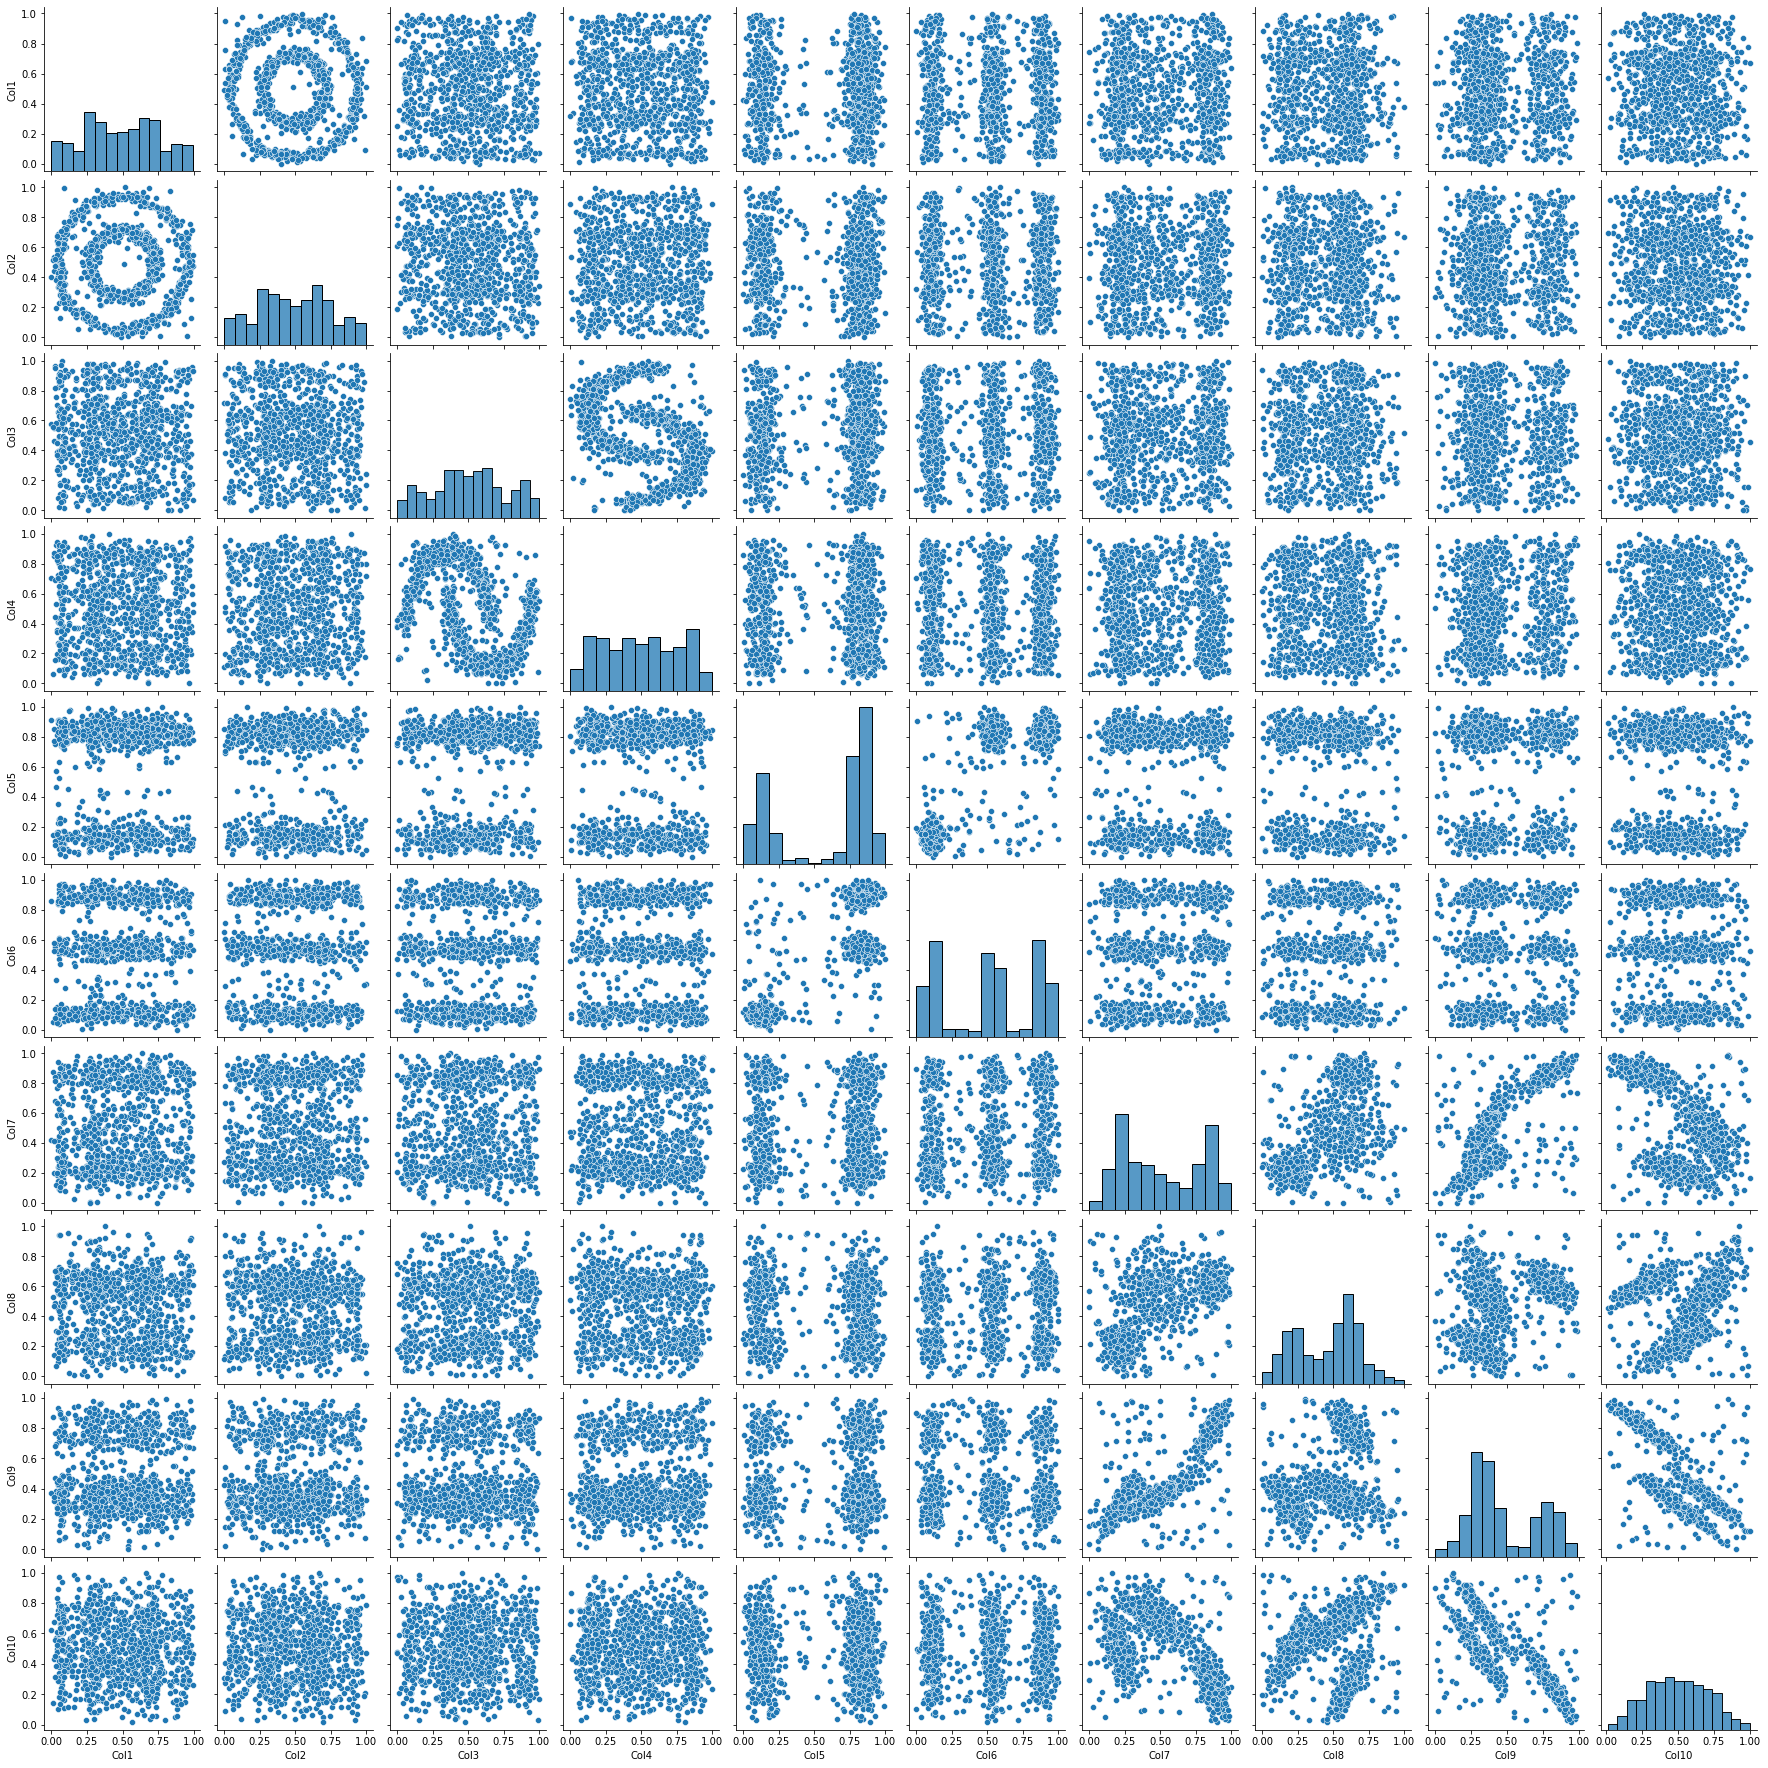

In [8]:
sns.pairplot(df)

##Anomaly detection

Set up the PyCaret environment for anomaly detection. For this, we can use Pycaret’s anomaly detection module which is an unsupervised machine-learning module used for identifying outliers in the data that can result in abnormal conditions.

In [9]:
from pycaret.anomaly import *
setup = setup(df, session_id = 1234)

In [10]:
# Choose the optimal model from the model library and create models for anomaly detection. We can display the list of models by using the model() function.

In [11]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [12]:
# Create the isolation Forest model by using the create_model() function. The isolation Forest algorithm differentiates observations by randomly selecting a feature and then randomly selecting split values between the maximum and minimum values.

In [13]:
iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1234, verbose=0)


In [14]:
# LOF is an algorithm of the unsupervised anomaly detection method and computes the local density deviation of a data point with respect to its neighbors.

In [15]:
lof = create_model('lof')
print(lof)

LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, p=2)


In [16]:
# KNN is a non-parametric lazy learning algorithm used to classify data based on similarities and various distance metrics. It provides a simple yet firm approach to detecting anomalies.

In [17]:
# with the use of PyCaret, we can just assign results via the assigned model function. We’ll start with the isolation forest model.

In [18]:
iforest_results = assign_model(iforest)
iforest_results.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0      -0.029193  
1  0.331679  0.429297  0.367422        0      -0.069396  
2  0.861309  0.899017  0.088600        0      -0.002432  
3  0.158963  0.073715  0.208463        1       0.049197  
4  0.558449  0.885169  0.182754        0      -0.000016

In [19]:
# assign_model() function returns a data frame with detection of anomalies, the presence of outliers are marked as 1 and non-outliers as 0, along with anomaly scores.

In [20]:
lof_results = assign_model(lof)
lof_results.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0       1.262565  
1  0.331679  0.429297  0.367422        0       1.043429  
2  0.861309  0.899017  0.088600        0       1.331218  
3  0.158963  0.073715  0.208463        1       1.591832  
4  0.558449  0.885169  0.182754        0       1.223609

In [21]:
#Filter the anomalies by each model

In [22]:
iforest_anomaly = iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape

(50, 12)

In [23]:
lof_anomaly=lof_results[lof_results['Anomaly']==1]
lof_anomaly.shape

(50, 12)

In [24]:
# From the above results, we can conclude that there would be most likely 50 anomalies out of 1000.

In [25]:
# Visualization is the most convenient way to interpret the information at hand in a creative and independent manner.

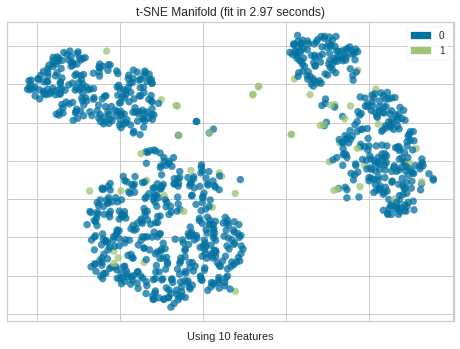

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 2.97 seconds)'}, xlabel='Using 10 features'>

In [26]:
from yellowbrick.features import Manifold
dfr = iforest_results['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df, dfr)
viz.show()

In [28]:
plot_model(iforest) # normalde grafik gelmeli!!!

In [31]:
plot_model(iforest, plot= 'umap') # 2 boyutlu grafik icin, ama yine calismadi

In [29]:
sns.pairplot(lof_results, hue = "Anomaly")

In [30]:
save_model(iforest,'IForest_Model') # modeli kaydetmek icin

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

In [32]:
# https://pycaret.org/anomaly-detection/
    
# https://pycaret.org/plot-model/

In [37]:
#PyOd library for anomaly detection

In [ ]:
# Isolation Forest

In [38]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [39]:
contamination = 0.15  # percentage of outliers
n_train = 500  # number of training points
n_test = 200  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [40]:
# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [41]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
IForest ROC:0.9422, precision @ rank n:0.76

On Test Data:
IForest ROC:0.8888, precision @ rank n:0.5667


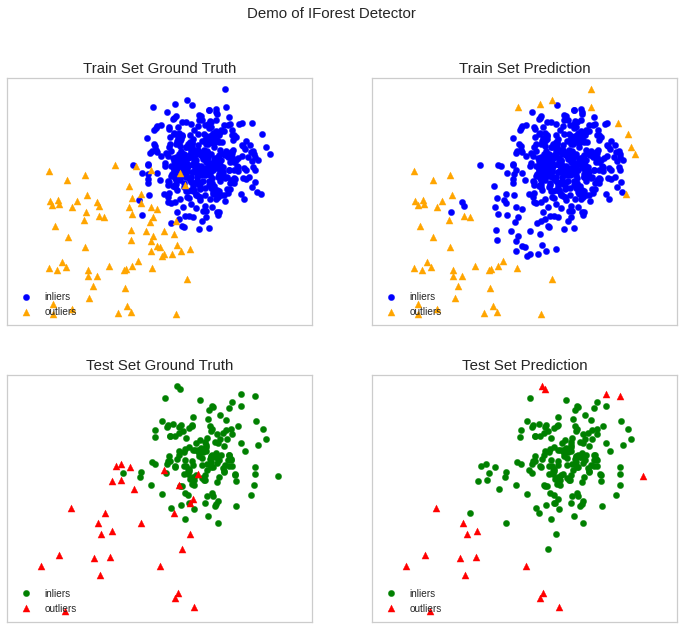

In [42]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [43]:
# Isolation Forest on sklearn

In [44]:
from sklearn.ensemble import IsolationForest

In [ ]:
max_features=1.0 # Her bir ağacı eğitmek için toplam degiskenlerden çıkarılacak degisken sayısıdır.
n_estimators=50 # olusturulacak agac sayisi
max_samples='auto'
contamination=float(0.2) # ayrkiri degerlerin verisetindeki tahmin edilen orani
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
model.fit(df[['Egg_weight']]) # aykiri deger incelemesi yapmak istedigin degiskeni yaz!

In [ ]:
df['scores']=forest_model.decision_function(df[['Egg_weight']])
df['anomaly_Value']=forest_model.predict(df[['Egg_weight']])
df.head(10)